In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs

In [3]:
ds = xr.open_dataset('/glade/work/mkorendy/metisregimes/metis.uqvi_pna_NDJFM.1986-2016.nc')

In [7]:
ds

<xarray.Dataset>
Dimensions:  (ensemble: 1, lat: 22, lon: 53, time: 302)
Coordinates:
  * lon      (lon) float64 151.9 154.7 157.5 160.3 ... 289.7 292.5 295.3 298.1
  * lat      (lat) float64 79.53 76.74 73.95 71.16 ... 29.3 26.51 23.72 20.93
  * time     (time) datetime64[ns] 1986-11-01 ... 1987-03-31T12:00:00
Dimensions without coordinates: ensemble
Data variables:
    uqvi     (ensemble, time, lat, lon) float64 -18.02 -16.13 ... -126.3 -80.68

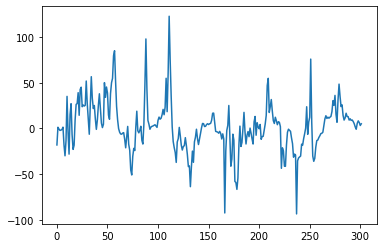

In [8]:
plt.plot(ds['uqvi'][0,:,0,0])

Text(0.5, 0.98, 'Metis199 UQVI, 1st Ensemble, First Year Mean')

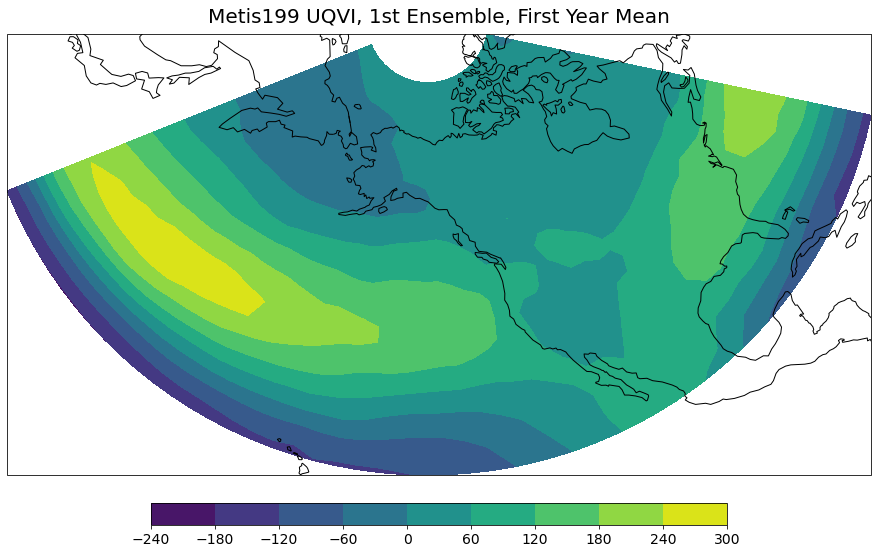

In [5]:
cm = 220

data_crs = ccrs.PlateCarree(central_longitude=cm)
proj = ccrs.NorthPolarStereo(central_longitude=cm)

# Set the axes using the specified map projection
fig,axs=plt.subplots(1,1,subplot_kw={'projection':proj},figsize=(20,15))

cs = axs.contourf(ds['lon'], ds['lat'], ds['uqvi'][0].mean('time'), transform=ccrs.PlateCarree())
axs.coastlines()
cbar_ax = fig.add_axes([0.3, 0.5, 0.4, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)
fig.subplots_adjust(bottom=0, top=1.5, left=0.2, right=0.8,
                    wspace=0.01, hspace=0.2)
plt.suptitle('Metis199 UQVI, 1st Ensemble, First Year Mean' ,fontsize=20)
#plt.savefig('metis199.uqvi.test_d00h.png')